# Adventure Motorcycle Segment

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('adv-moto-data.csv')
df

Manufacturer                        Model  Engine (cc)      Category
0               BMW                      R1150GS         1130   Heavyweight
1               BMW                      R1200GS         1170   Heavyweight
2               BMW                      R1250GS         1254   Heavyweight
3               BMW                F650GS/G650GS          652  Middleweight
4               BMW                       F800GS          798  Middleweight
5               BMW                       F850GS          853  Middleweight
6               BMW                       G310GS          313   Lightweight
7          Kawasaki                       KLR650          652   Lightweight
8          Kawasaki                   Versys 650          649  Middleweight
9          Kawasaki                  Versys 1000         1043   Heavyweight
10         Kawasaki                 Versys-X 300          296   Lightweight
11           Suzuki                 V-Strom 1000          996   Heavyweight
12           Suzuki                  V-Strom 650          645  Middleweight
13           Suzuki                V-Strom 800DE          776  Middleweight
14            Honda                       XR650L          644   Lightweight
15            Honda  Africa Twin 1000 (CRF1000L)          998   Heavyweight
16            Honda  Africa Twin 1100 (CRF1100L)         1084   Heavyweight
17            Honda                       CB500X          471   Lightweight
18            Honda                       NC700X          670  Middleweight
19            Honda               XL750 Transalp          755  Middleweight
20            Honda                CRF300L Rally          286   Lightweight
21           Yamaha            Super Tenere 1200         1199   Heavyweight
22           Yamaha                       Tenere          689  Middleweight
23          Triumph                   Tiger 955i          955   Heavyweight
24          Triumph                   Tiger 1050         1050   Heavyweight
25          Triumph                    Tiger 800          799  Middleweight
26          Triumph                    Tiger 900          888  Middleweight
27          Triumph                   Tiger 1200         1215   Heavyweight
28           Ducati             Multistrada 1100         1078   Heavyweight
29           Ducati             Multistrada 1260         1262   Heavyweight
30           Ducati               Multistrada V4         1158   Heavyweight
31           Ducati           Multistrada 950/V2          937  Middleweight
32           Ducati                      DesertX          937  Middleweight
33              KTM                640 Adventure          625   Lightweight
34              KTM                950 Adventure          942   Heavyweight
35              KTM                990 Adventure          999   Heavyweight
36              KTM               1190 Adventure         1195   Heavyweight
37              KTM         1290 Super Adventure         1301   Heavyweight
38              KTM                790 Adventure          799  Middleweight
39              KTM                890 Adventure          889  Middleweight
40              KTM                390 Adventure          373   Lightweight
41          Aprilia                Caponord 1000          998   Heavyweight
42          Aprilia                Caponord 1200         1197   Heavyweight
43          Aprilia                   Tuareg 660          659  Middleweight
44       Moto Guzzi                 Stelvio 1200         1151   Heavyweight
45       Moto Guzzi                       V85 TT          853  Middleweight
46     Buell/Harley          Buell Ulysses XB12X         1203   Heavyweight
47  Harley-Davidson             Pan America 1250         1252   Heavyweight
48             Zero             DSR/X (electric)            0   Heavyweight

In [20]:
df.groupby('Category')['Engine (cc)'].mean().astype(int)

Category
Heavyweight     1076
Lightweight      457
Middleweight     779
Name: Engine (cc), dtype: int64

## Let's visualize our data

### Plotting engine size

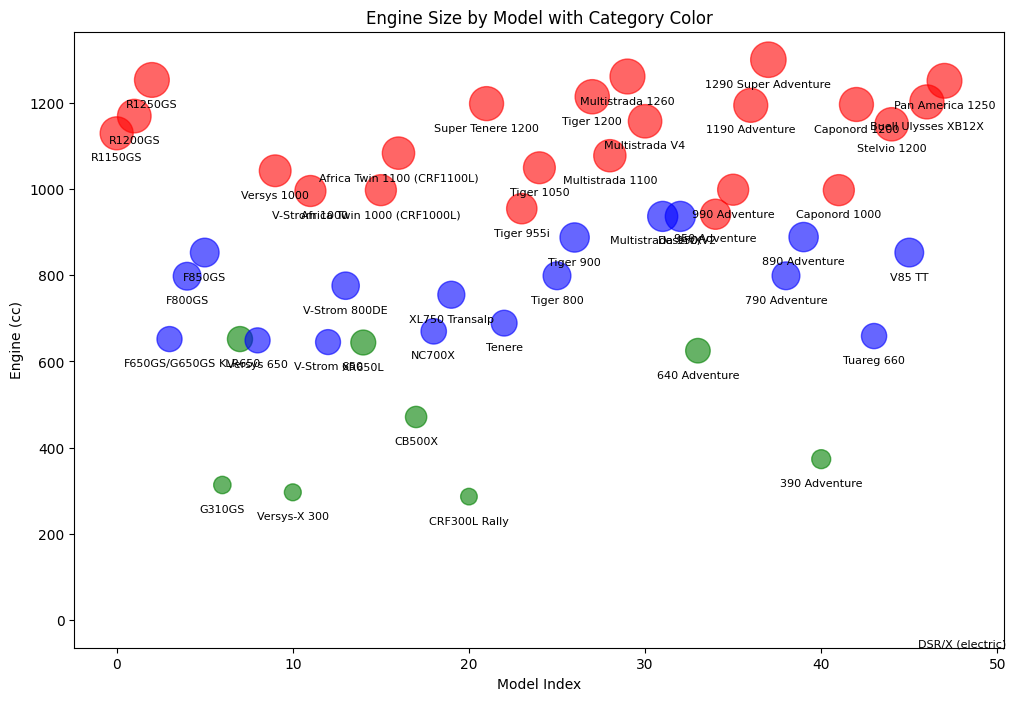

In [21]:
# Map categories to colors
colors = {'Heavyweight': 'red', 'Middleweight': 'blue', 'Lightweight': 'green'}
df['Color'] = df['Category'].map(colors)

plt.figure(figsize=(12, 8))

# Use df.index for the x-axis and 'Engine (cc)' for the y-axis.
# The marker size is proportional to engine size, scaled down by a factor.
scaling_factor = 0.5
plt.scatter(
    df.index,
    df['Engine (cc)'],
    s=df['Engine (cc)'] * scaling_factor,
    color=df['Color'],
    alpha=0.6
)

# Annotate each point with the model name, offset slightly above the marker
for i, row in df.iterrows():
    plt.annotate(
        row['Model'],
        (i, row['Engine (cc)']),
        textcoords="offset points",
        xytext=(0, -14),  # Offset label by 10 points below the marker
        ha='center',
        va='top',  # Align text so that its top is at the offset position
        fontsize=8
    )

plt.xlabel('Model Index')
plt.ylabel('Engine (cc)')
plt.title('Engine Size by Model with Category Color')
plt.show()

## Visualizing Engine Size by Category

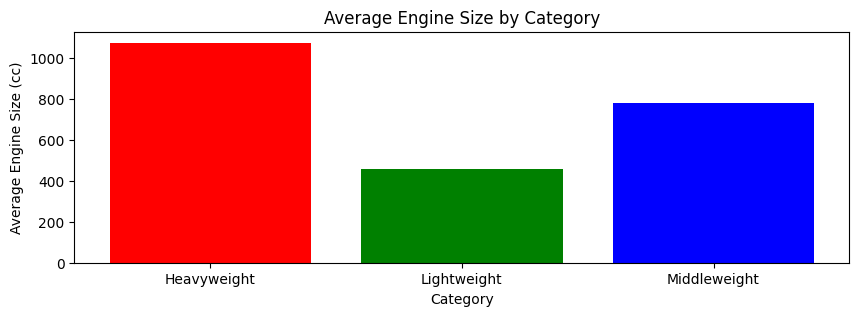

In [22]:
# Compute the average engine size by category
avg_engine_size = df.groupby('Category')['Engine (cc)'].mean()

# Define colors for each category
colors = {'Heavyweight': 'red', 'Middleweight': 'blue', 'Lightweight': 'green'}

# Create the bar plot
plt.figure(figsize=(10, 3))
plt.bar(avg_engine_size.index, avg_engine_size.values,
        color=[colors[cat] for cat in avg_engine_size.index])
plt.xlabel('Category')
plt.ylabel('Average Engine Size (cc)')
plt.title('Average Engine Size by Category')
plt.show()